<a href="https://colab.research.google.com/github/PolyGon-13/DataScience_Study/blob/main/Visualization/02_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager,rc

In [1]:
# 해당 명령어 실행 후 세션 다시 시작 후 아래 명령어 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (11.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123605 files and direc

In [2]:
# 코랩 환경에서 한글 깨짐 해결 방법
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [3]:
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# Scatter Plot

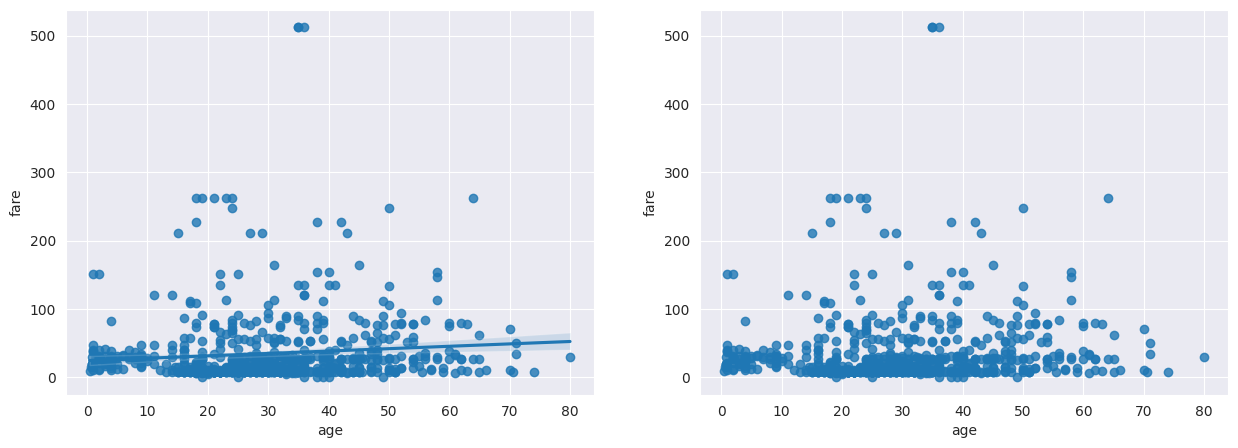

In [7]:
titanic=sns.load_dataset('titanic')

sns.set_style('darkgrid')

fig,axes=plt.subplots(1,2,figsize=(15,5))

sns.regplot(x='age',
            y='fare',
            data=titanic,
            ax=axes[0])

sns.regplot(x='age',
            y='fare',
            data=titanic,
            ax=axes[1],
            fit_reg=False) # 회귀선 미표시

plt.show()

# Histogram & Kernel Density Estimation(KDE)

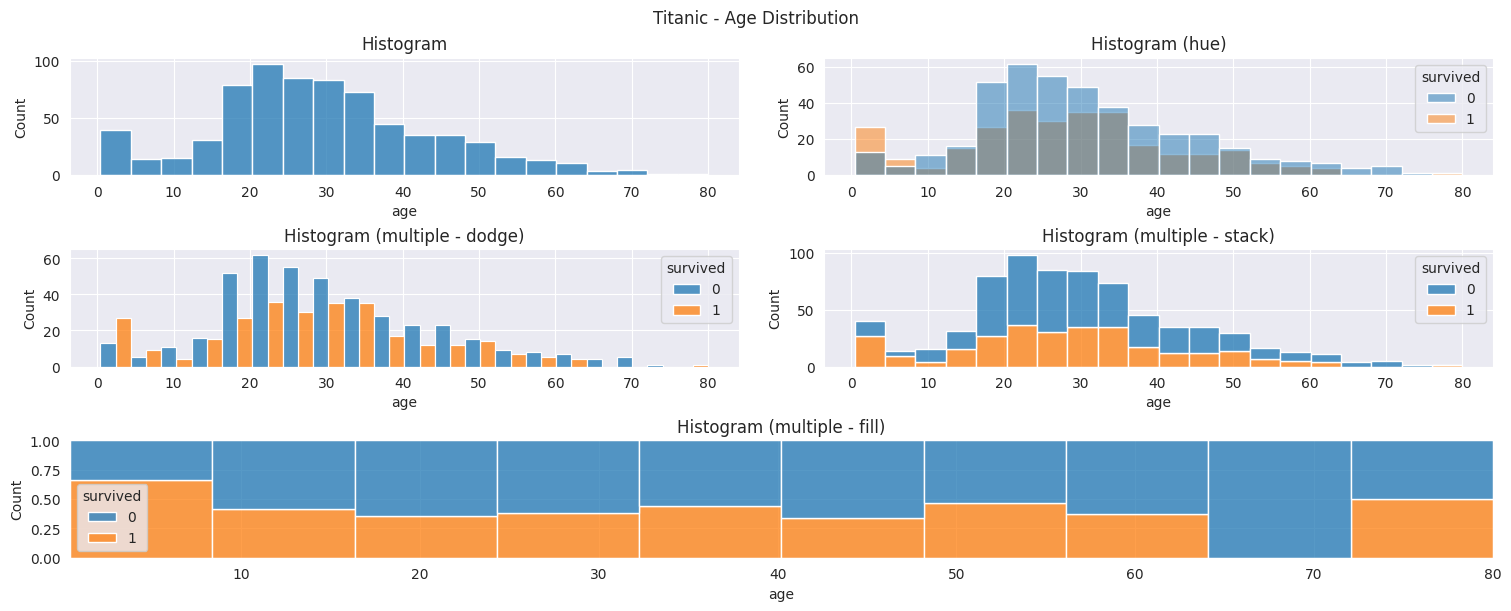

In [10]:
fig,axes=plt.subplot_mosaic([['top_left','top_right'],
                             ['middle_left','middle_right'],
                             ['bottom','bottom']],
                            figsize=(15,6),
                            constrained_layout=True) # True로 설정하면 서브플롯 간의 간격과 여백을 자동으로 최적화

sns.histplot(x='age',data=titanic,ax=axes['top_left'])
sns.histplot(x='age',hue='survived',data=titanic,ax=axes['top_right'])
sns.histplot(x='age',hue='survived',multiple='dodge',data=titanic,ax=axes['middle_left'])
sns.histplot(x='age',hue='survived',multiple='stack',data=titanic,ax=axes['middle_right'])
sns.histplot(x='age',hue='survived',multiple='fill',bins=10,data=titanic,ax=axes['bottom'])

fig.suptitle('Titanic - Age Distribution')

axes['top_left'].set_title('Histogram')
axes['top_right'].set_title('Histogram (hue)')
axes['middle_left'].set_title('Histogram (multiple - dodge)')
axes['middle_right'].set_title('Histogram (multiple - stack)')
axes['bottom'].set_title('Histogram (multiple - fill)')

plt.show()

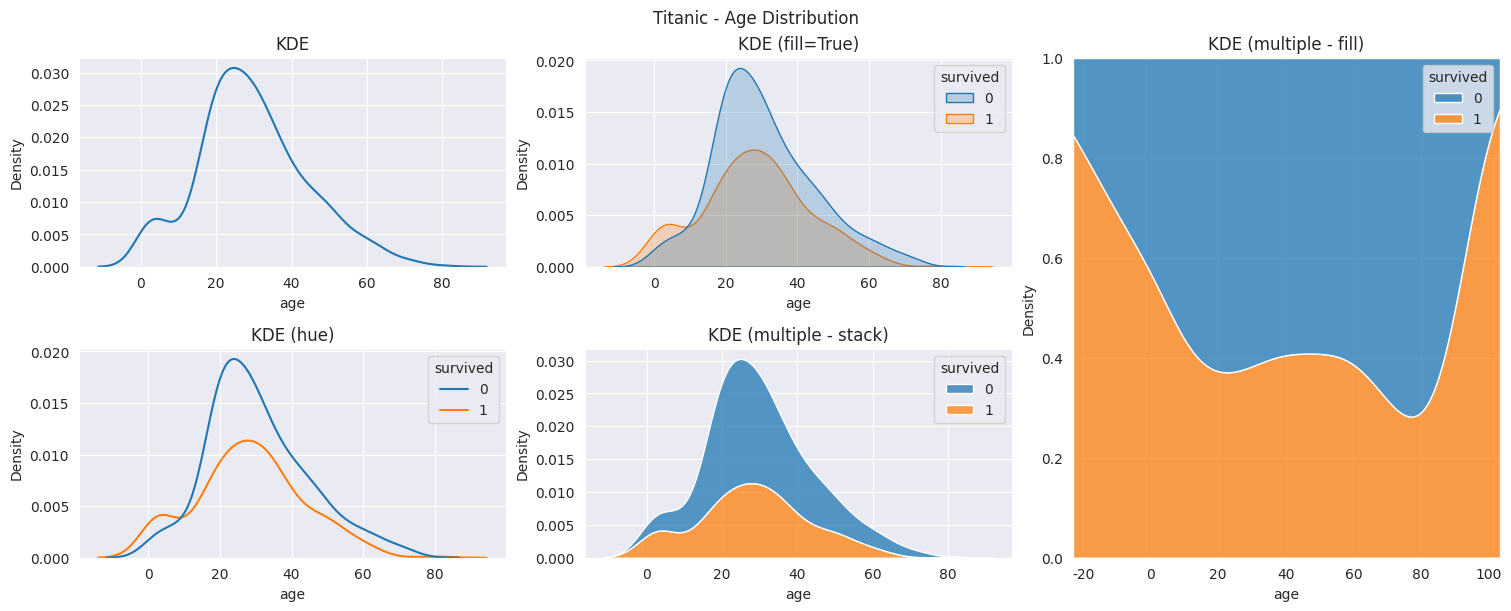

In [11]:
fig,axes=plt.subplot_mosaic([['top_left','top_center','right'],
                             ['bottom_left','bottom_center','right']],
                            figsize=(15,6),
                            constrained_layout=True)

sns.kdeplot(x='age',data=titanic,ax=axes['top_left'])
sns.kdeplot(x='age',hue='survived',data=titanic,ax=axes['bottom_left'])
sns.kdeplot(x='age',hue='survived',fill=True,data=titanic,ax=axes['top_center']) # fill=True로 설정하면 KDE 곡선 아래 영역을 채움
sns.kdeplot(x='age',hue='survived',multiple='stack',data=titanic,ax=axes['bottom_center'])
sns.kdeplot(x='age',hue='survived',multiple='fill',bw_adjust=2.0,data=titanic,ax=axes['right']) # bw_adjust는 곡선의 부드러움을 제어하는 대역폭을 결정(클수록 더 부드럽게 표현)

fig.suptitle('Titanic - Age Distribution')

axes['top_left'].set_title('KDE')
axes['bottom_left'].set_title('KDE (hue)')
axes['top_center'].set_title('KDE (fill=True)')
axes['bottom_center'].set_title('KDE (multiple - stack)')
axes['right'].set_title('KDE (multiple - fill)')

plt.show()

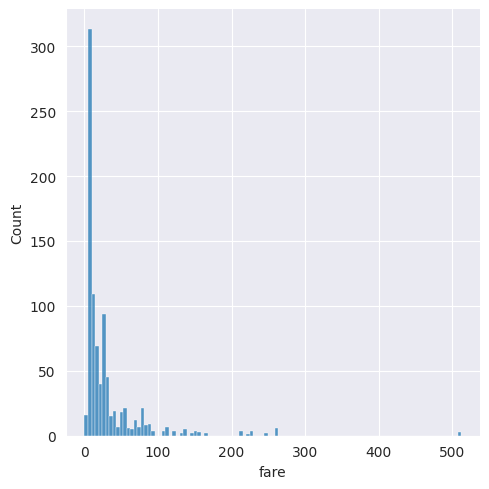

In [12]:
sns.displot(titanic['fare'],kind='hist')
plt.show()

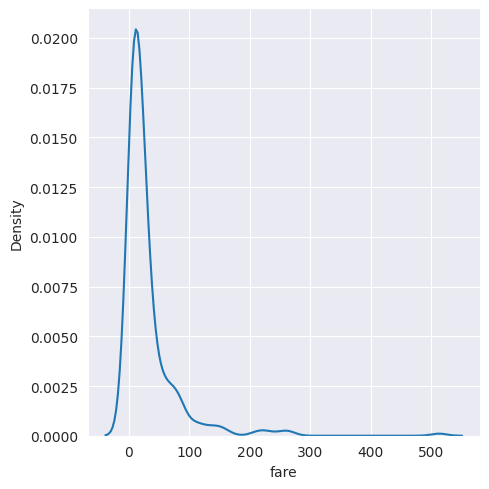

In [16]:
sns.displot(titanic['fare'],kind='kde')
plt.show()

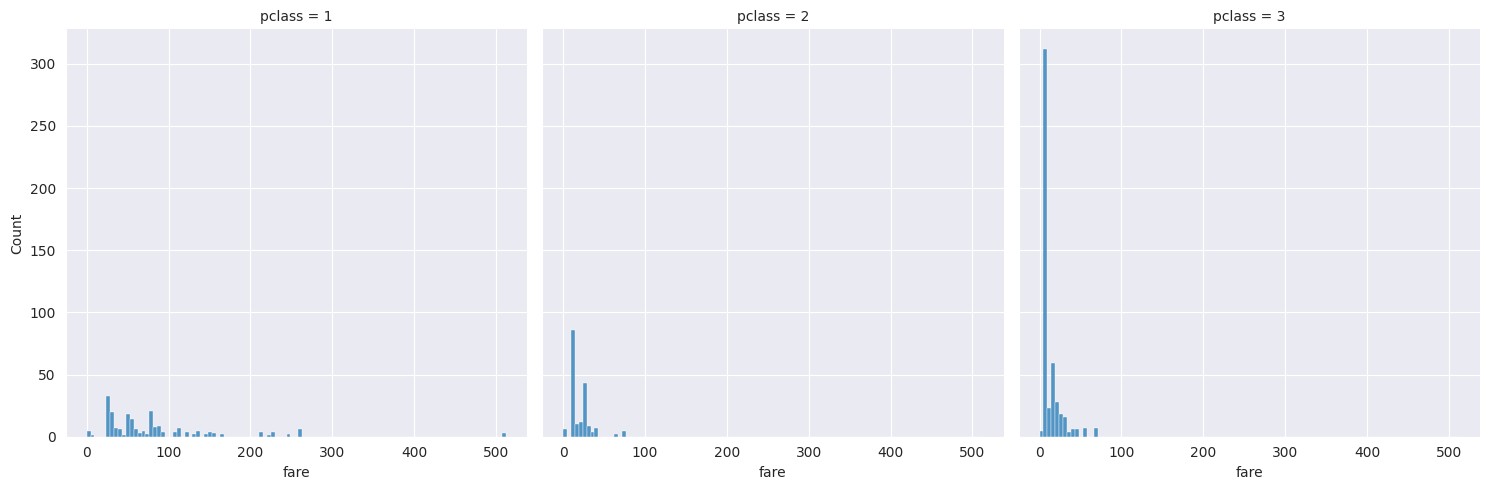

In [21]:
sns.displot(data=titanic,x='fare',col='pclass',kind='hist')
plt.show()

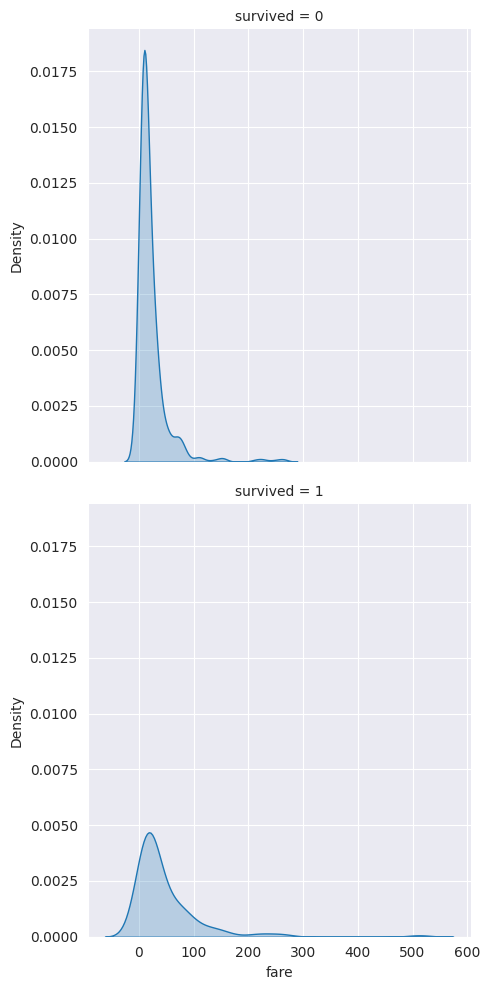

In [22]:
sns.displot(data=titanic,x='fare',row='survived',kind='kde',fill=True)
plt.show()

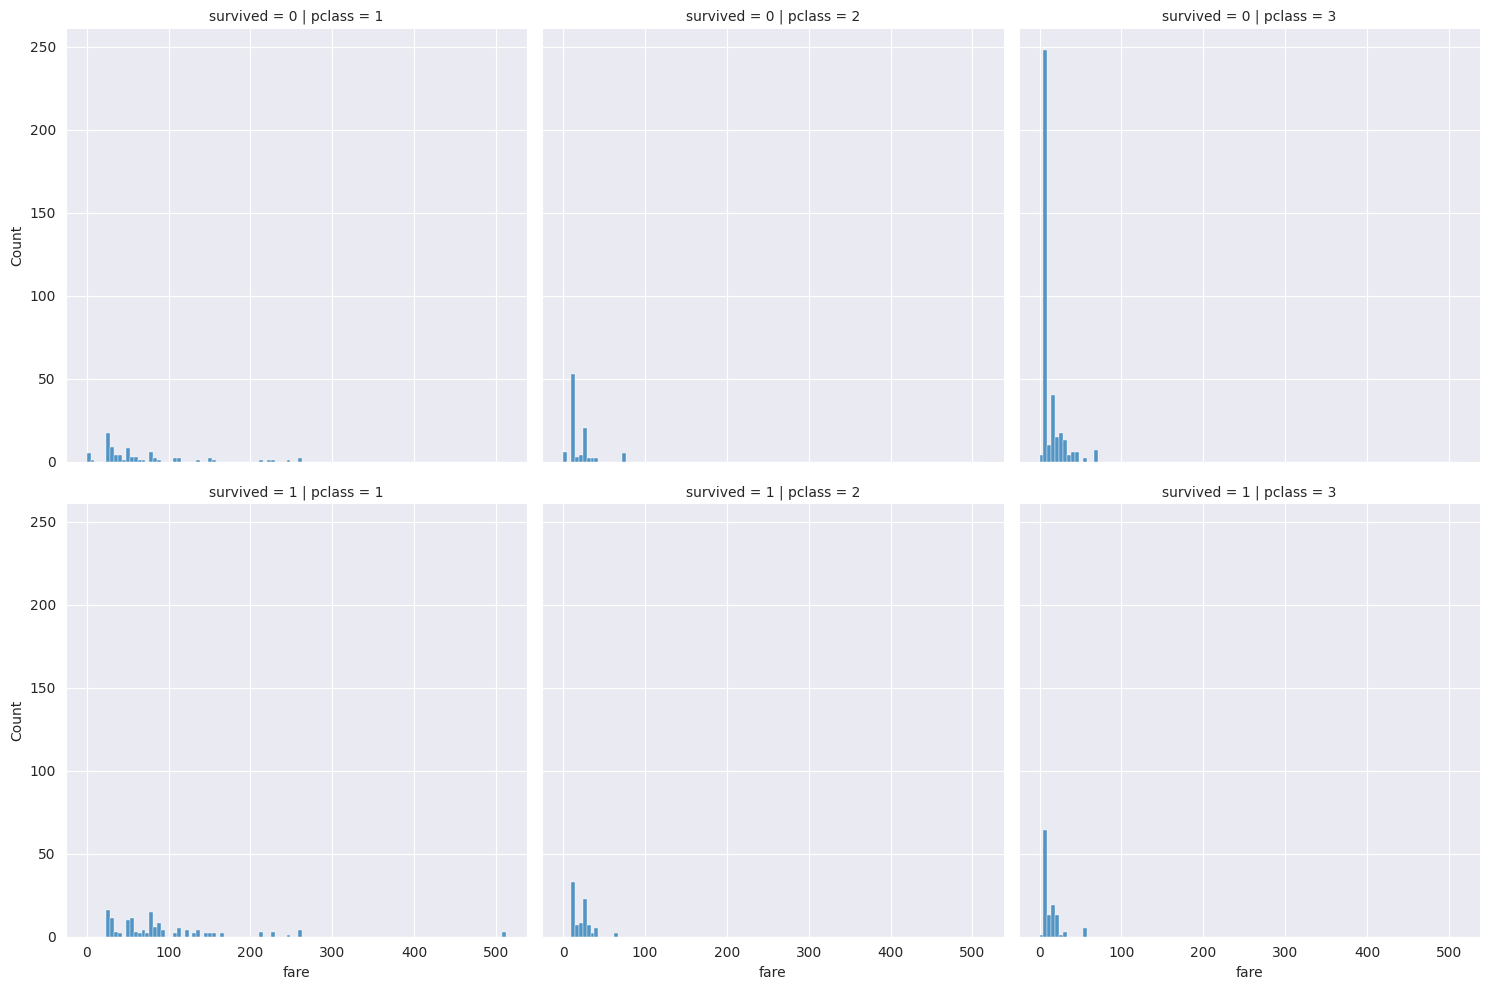

In [23]:
sns.displot(data=titanic,x='fare',col='pclass',row='survived')
plt.show()

# Contour Plot & 2D Histogram

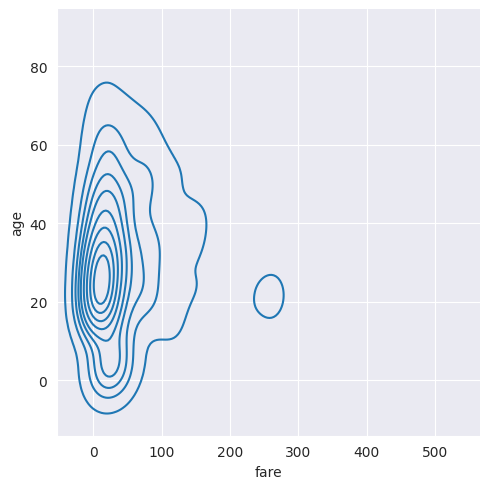

In [24]:
sns.displot(x='fare',y='age',data=titanic,kind='kde')
plt.show()

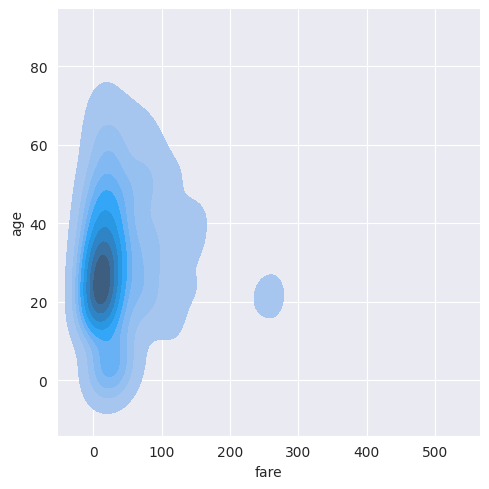

In [25]:
sns.displot(x='fare',y='age',data=titanic,kind='kde',fill=True)
plt.show()

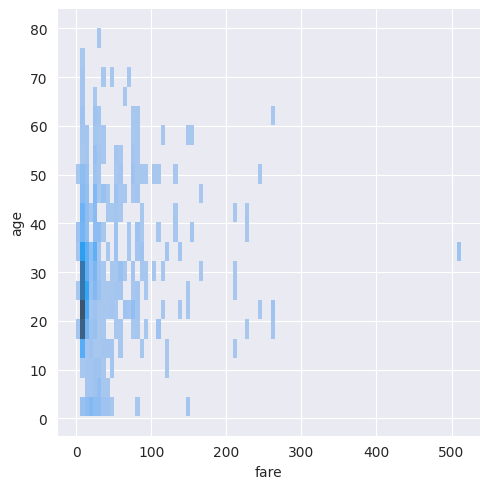

In [26]:
sns.displot(x='fare',y='age',data=titanic,kind='hist')
plt.show()

# Heatmap

In [27]:
titanic=sns.load_dataset('titanic')

sns.set_style('darkgrid')

table=titanic.pivot_table(index=['sex'],columns=['class'],aggfunc='size',observed=False) # observed=False는 실제로 조합되지 않는 범주의 조합도 데이터에 표시되게 함
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


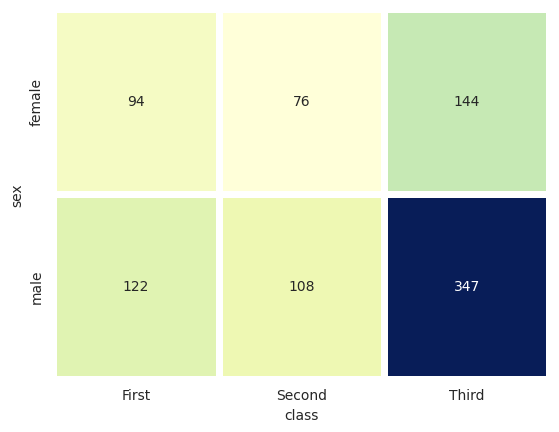

In [32]:
sns.heatmap(table,
            annot=True,fmt='d',
            cmap='YlGnBu',
            linewidth=5,
            cbar=False)

plt.show()

# Scatter Plot of Categorical Data

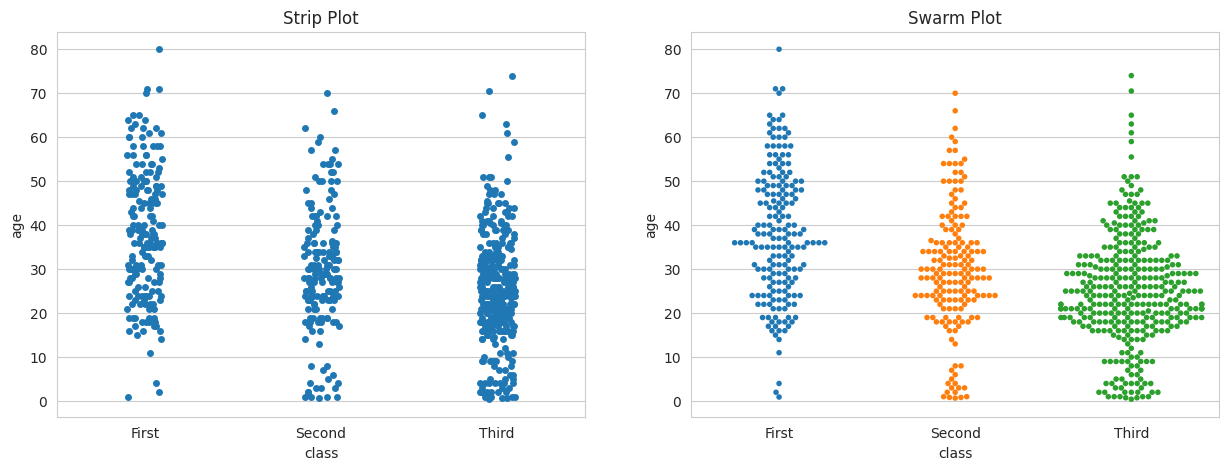

In [33]:
titanic=sns.load_dataset('titanic')

sns.set_style('whitegrid')

fig,axes=plt.subplots(1,2,figsize=(15,5))

sns.stripplot(x='class',y='age',data=titanic,ax=axes[0])
sns.swarmplot(x='class',y='age',data=titanic,ax=axes[1],hue='class',size=4)

axes[0].set_title('Strip Plot')
axes[1].set_title('Swarm Plot')

plt.show()

# Bar Plot

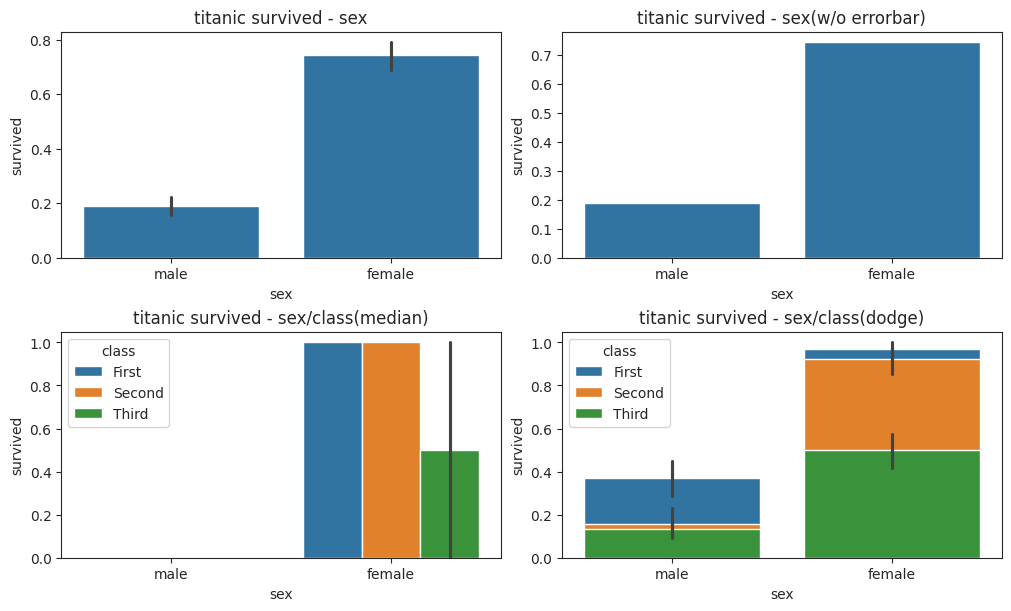

In [37]:
sns.set_style('ticks')

fig,axes=plt.subplots(2,2,figsize=(10,6),constrained_layout=True)

sns.barplot(x='sex',y='survived',data=titanic,ax=axes[0,0])
sns.barplot(x='sex',y='survived',data=titanic,errorbar=None,ax=axes[0,1]) # errorbar=None으로 오차 막대를 표시하지 않음
sns.barplot(x='sex',y='survived',hue='class',data=titanic,ax=axes[1,0],errorbar=('ci',95),estimator='median')
sns.barplot(x='sex',y='survived',hue='class',dodge=False,data=titanic,ax=axes[1,1])

axes[0,0].set_title('titanic survived - sex')
axes[0,1].set_title('titanic survived - sex(w/o errorbar)')
axes[1,0].set_title('titanic survived - sex/class(median)')
axes[1,1].set_title('titanic survived - sex/class(dodge)')

plt.show()

# Frequency Plot

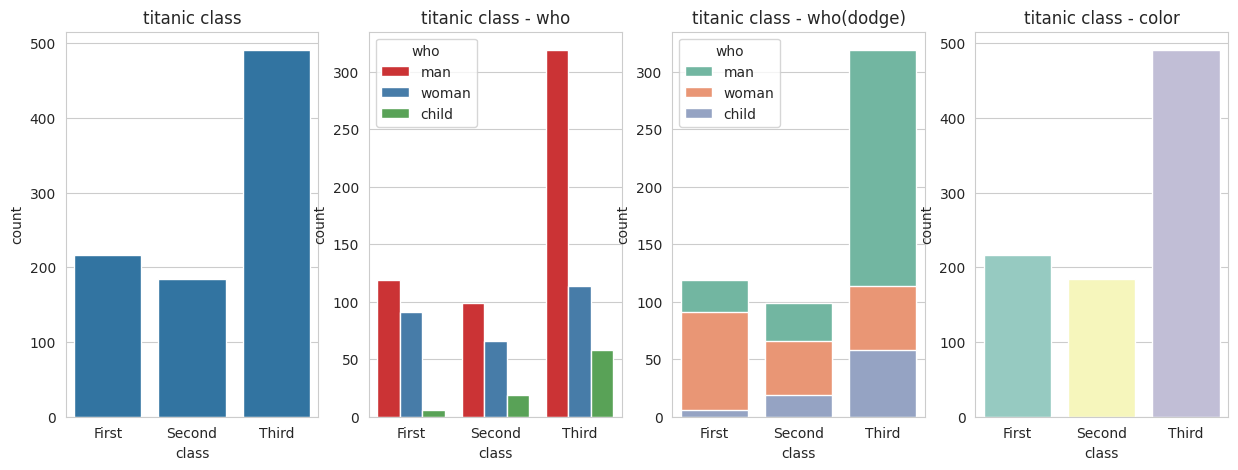

In [38]:
sns.set_style('whitegrid')

fig,axes=plt.subplots(1,4,figsize=(15,5))

sns.countplot(x='class',data=titanic,ax=axes[0])
sns.countplot(x='class',hue='who',palette='Set1',dodge=True,data=titanic,ax=axes[1])
sns.countplot(x='class',hue='who',palette='Set2',dodge=False,data=titanic,ax=axes[2])
sns.countplot(x='class',hue='class',palette='Set3',data=titanic,ax=axes[3])

axes[0].set_title('titanic class')
axes[1].set_title('titanic class - who')
axes[2].set_title('titanic class - who(dodge)')
axes[3].set_title('titanic class - color')

plt.show()

# Box Plot & Violin Plot

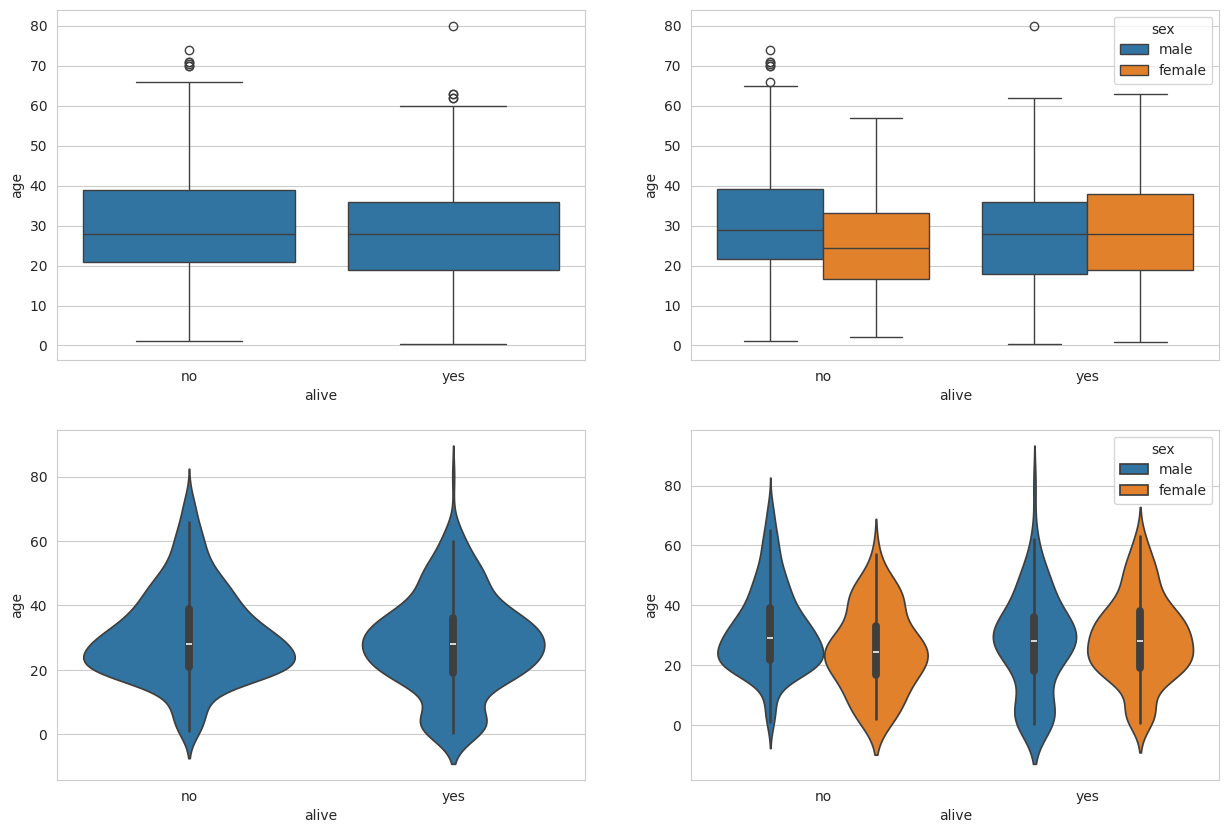

In [40]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

sns.boxplot(x='alive',y='age',data=titanic,ax=axes[0,0])
sns.boxplot(x='alive',y='age',hue='sex',data=titanic,ax=axes[0,1])
sns.violinplot(x='alive',y='age',data=titanic,ax=axes[1,0])
sns.violinplot(x='alive',y='age',hue='sex',data=titanic,ax=axes[1,1])

plt.show()

# Joint Plot

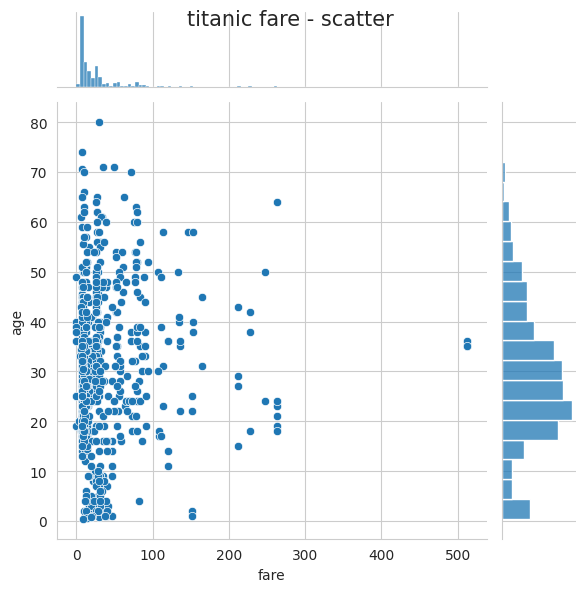

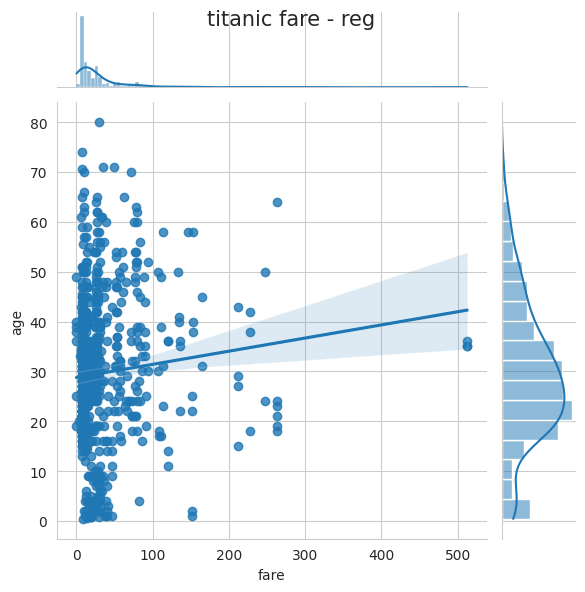

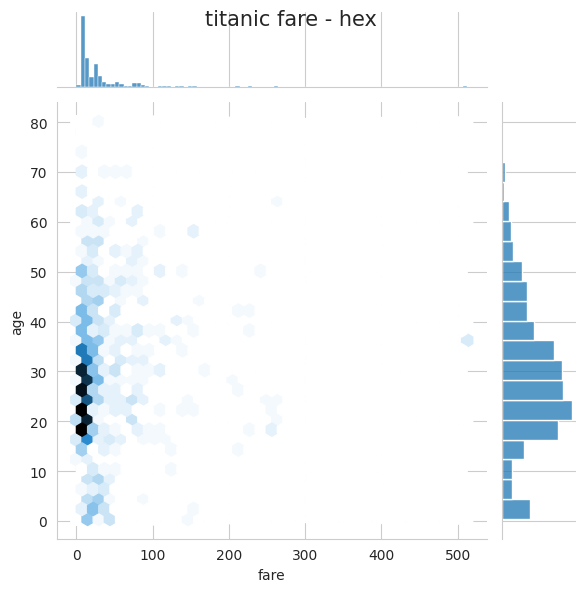

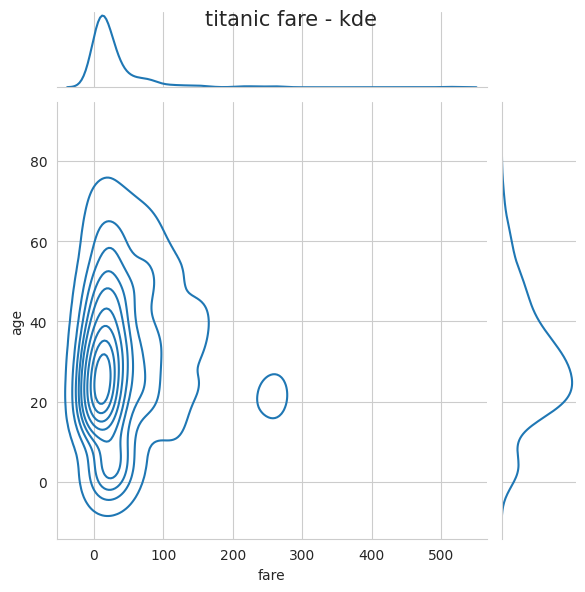

In [47]:
j1=sns.jointplot(x='fare',y='age',data=titanic)
j2=sns.jointplot(x='fare',y='age',kind='reg',data=titanic)
j3=sns.jointplot(x='fare',y='age',kind='hex',data=titanic)
j4=sns.jointplot(x='fare',y='age',kind='kde',data=titanic)

j1.fig.suptitle('titanic fare - scatter',size=15)
j2.fig.suptitle('titanic fare - reg',size=15)
j3.fig.suptitle('titanic fare - hex',size=15)
j4.fig.suptitle('titanic fare - kde',size=15)

plt.show()

# Applying conditions to partition the screen into a grid

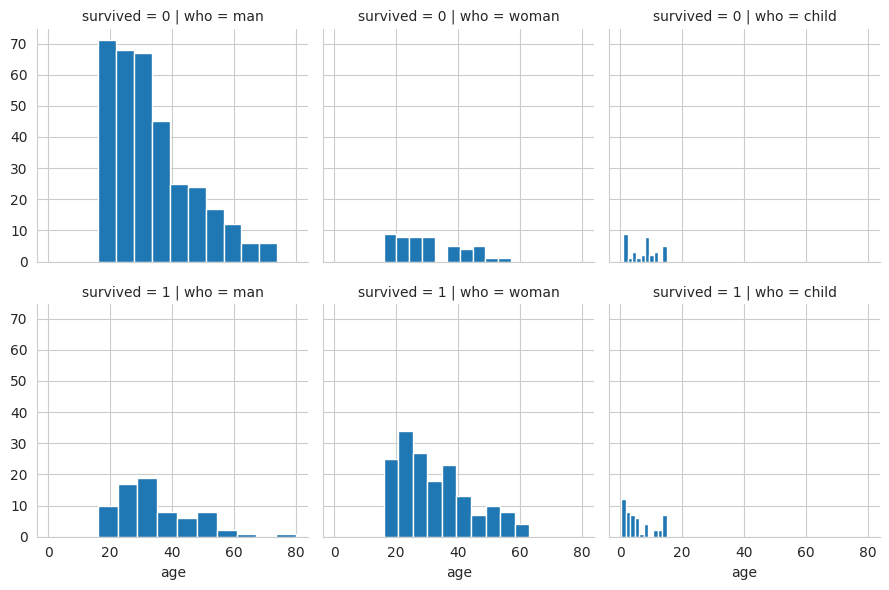

In [54]:
titanic=sns.load_dataset('titanic')

sns.set_style('whitegrid')

g=sns.FacetGrid(data=titanic,col='who',row='survived')
g=g.map(plt.hist,'age')

# Distribution of bivariate data

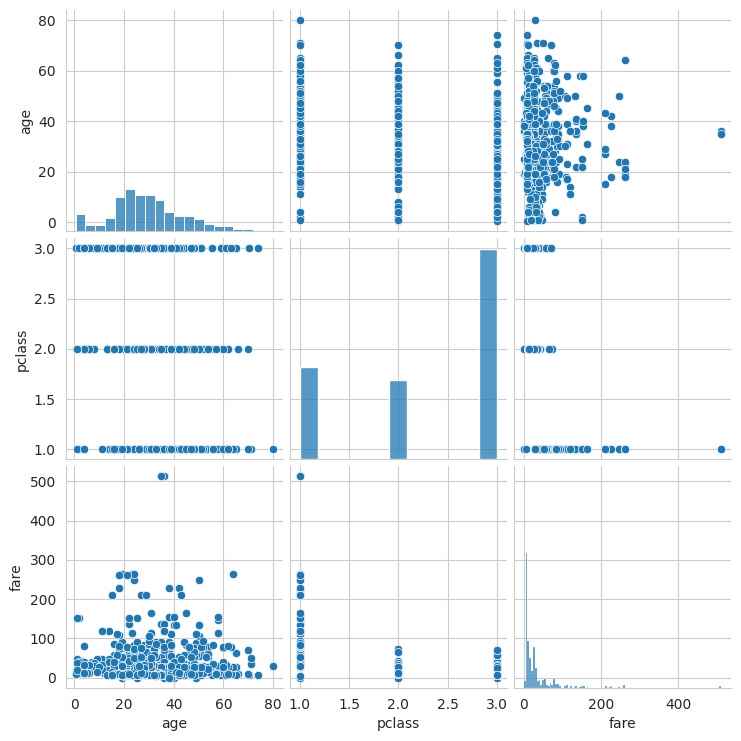

In [55]:
titanic_pair=titanic[['age','pclass','fare']]

g=sns.pairplot(titanic_pair)